In [35]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.nn import softmax
from tensorflow.nn import sigmoid
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import Sequential, layers
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy

In [36]:
df=pd.read_csv("mushroom_cleaned.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [37]:
targets = pd.DataFrame(df["class"], columns=["class"])

targets.value_counts()

class
1        29675
0        24360
Name: count, dtype: int64

In [38]:
#balancing class col to have equal number of 0 and 1
class_1 = df[df["class"] == 1].head(24000)
class_0 = df[df["class"] == 0].head(24000)

balanced_df = pd.concat([class_1, class_0])
targets = pd.DataFrame(balanced_df["class"], columns=["class"])

targets.value_counts()


class
0        24000
1        24000
Name: count, dtype: int64

In [39]:
df.drop(columns=['class'], inplace=True)


In [40]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season'],
      dtype='object')

In [41]:
cols = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
                     'stem-height', 'stem-width', 'stem-color', 'season']


x = df[cols]
mean_x = x.mean()
std_x = x.std()

df[cols] = (x - mean_x) / std_x

df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
count,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04
mean,7.574213e-17,5.891055e-17,1.683159e-17,-5.891055e-17,2.188106e-16,-7.784608e-17,-4.207896e-17,2.735133e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.576223e+00,-1.851564e+00,-9.610715e-01,-2.290281e+00,-1.165470e+00,-1.343997e+00,-2.580583e+00,-3.026211e+00
25%,-7.731863e-01,-9.258550e-01,-9.610715e-01,-7.279110e-01,-7.498255e-01,-8.056728e-01,-7.412645e-01,-2.084882e-01
50%,-1.174190e-01,4.627091e-01,-5.124037e-01,2.095111e-01,-2.547200e-01,-1.637751e-01,7.915009e-01,-2.934747e-02
75%,5.939218e-01,9.255638e-01,8.335995e-01,8.344592e-01,4.543199e-01,6.034333e-01,7.915009e-01,-2.934747e-02
max,3.678251e+00,9.255638e-01,1.730935e+00,1.146933e+00,4.725589e+00,3.219614e+00,1.098054e+00,2.788376e+00


In [42]:
# converting into tensors
inputs_tf = tf.constant(df)
targets_tf = tf.cast(tf.constant(targets), tf.float64)

In [43]:
inputs_tf = inputs_tf[:48000]

In [44]:
model = Sequential([
    layers.Dense(1, activation='sigmoid'),
])

model.build(input_shape=inputs_tf.shape)


In [45]:
model.compile(
    loss = binary_crossentropy,
    optimizer = SGD(learning_rate=0.001),
    metrics = ["accuracy"]
)

In [46]:
inputs_tf.shape,targets_tf.shape

(TensorShape([48000, 8]), TensorShape([48000, 1]))

In [47]:
history = model.fit(
    inputs_tf,
    targets_tf,
    epochs = 100,
    batch_size = 70
)

Epoch 1/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5342 - loss: 0.7825
Epoch 2/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5496 - loss: 0.7318
Epoch 3/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5657 - loss: 0.6949
Epoch 4/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5829 - loss: 0.6703
Epoch 5/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6078 - loss: 0.6484
Epoch 6/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6336 - loss: 0.6367
Epoch 7/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6628 - loss: 0.6272
Epoch 8/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6855 - loss: 0.6176
Epoch 9/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6938 - loss: 0.6134
Epoch 10/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6956 - loss: 0.6136
Epoch 11/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6997 - loss: 0.6111
Epoch 12/100
686/686 ━━━━━━━━━━━━━━━━━━━━

In [48]:
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss
0,0.537771,0.768773
1,0.555313,0.720491
2,0.570833,0.686201
3,0.589354,0.662157
4,0.614333,0.645350
...,...,...
95,0.690167,0.602298
96,0.689854,0.602298
97,0.690104,0.602297
98,0.689812,0.602297


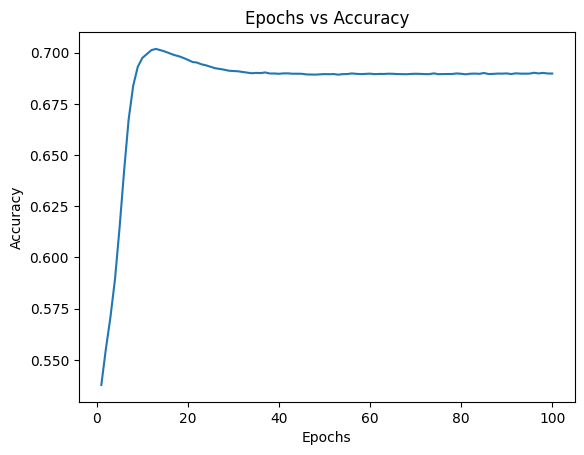

In [50]:
# Extract the accuracy values
accuracy_list = history_df['accuracy']
epochs = range(1, len(accuracy_list) + 1) 

plt.plot(epochs, accuracy_list)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Epochs vs Accuracy')
plt.show()


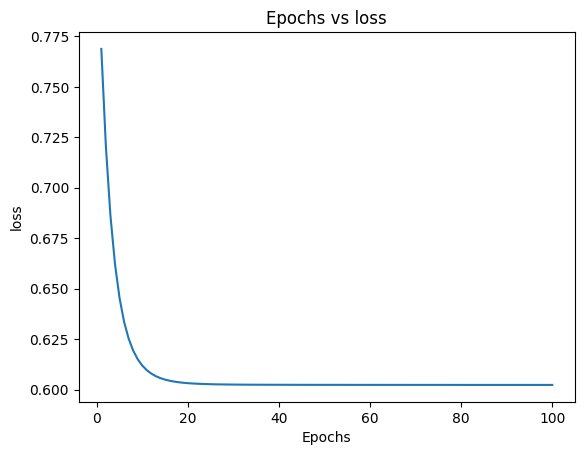

In [53]:
# Extract the loss values
loss= history_df['loss']
epochs = range(1, len(loss) + 1) 

plt.plot(epochs,loss)

plt.ylabel('loss')
plt.xlabel('Epochs')
plt.title('Epochs vs loss')
plt.show()
